In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


In [10]:
train_dir = 'C:\\archive (1)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train'
valid_dir = 'C:\\archive (1)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid'

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # adjust the target size as needed
    batch_size=32,
    class_mode='categorical'  # adjust class mode based on your problem
)

Found 70295 images belonging to 38 classes.


In [13]:
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),  # adjust the target size as needed
    batch_size=32,
    class_mode='categorical'  # adjust class mode based on your problem
)


Found 17572 images belonging to 38 classes.


In [7]:
checkpoint_path = "model_checkpoint.h5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min', 
                             verbose=1)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(38, activation='softmax'))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [10]:
model.fit(train_generator,
          epochs=20,  # Increase the number of epochs
          validation_data=valid_generator,
          callbacks=[checkpoint]) 

Epoch 1/20
2197/2197 [==============================] - ETA: 0s - loss: 1.1610 - accuracy: 0.6564
Epoch 1: val_loss improved from inf to 0.42323, saving model to model_checkpoint.h5


C:\Users\shubh kamra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2197/2197 [==============================] - 3716s 2s/step - loss: 1.1610 - accuracy: 0.6564 - val_loss: 0.4232 - val_accuracy: 0.8705
Epoch 2/20
2197/2197 [==============================] - ETA: 0s - loss: 0.4640 - accuracy: 0.8524
Epoch 2: val_loss improved from 0.42323 to 0.24188, saving model to model_checkpoint.h5
2197/2197 [==============================] - 3675s 2s/step - loss: 0.4640 - accuracy: 0.8524 - val_loss: 0.2419 - val_accuracy: 0.9237
Epoch 3/20
2197/2197 [==============================] - ETA: 0s - loss: 0.3075 - accuracy: 0.9015
Epoch 3: val_loss improved from 0.24188 to 0.20878, saving model to model_checkpoint.h5
2197/2197 [==============================] - 3657s 2s/step - loss: 0.3075 - accuracy: 0.9015 - val_loss: 0.2088 - val_accuracy: 0.9305
Epoch 4/20
2197/2197 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9271
Epoch 4: val_loss improved from 0.20878 to 0.20021, saving model to model_checkpoint.h5
2197/2197 [==========================

KeyboardInterrupt: 

In [7]:
loaded_model = load_model("model_checkpoint.h5")

1/1 [==============================] - 0s 185ms/step
Plant Name: Corn_(maize)
Disease Status: Cercospora_leaf_spot Gray_leaf_spot
94.68697309494019


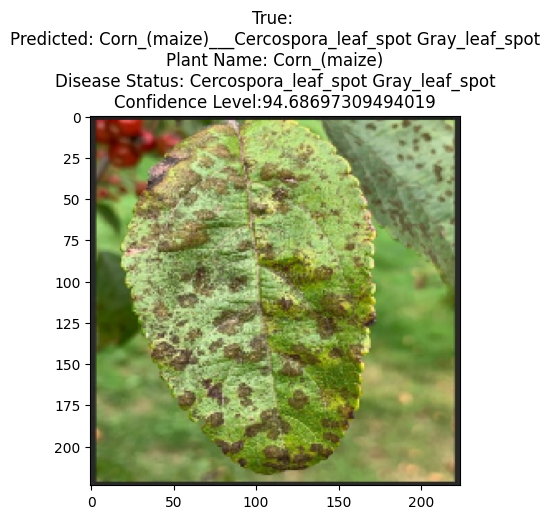

In [17]:
import matplotlib.pyplot as plt
img_path = r"C:\Users\shubh kamra\Downloads\ap.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values
prediction = loaded_model.predict(img_array)
class_indices = train_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}
predicted_class = inv_class_indices[np.argmax(prediction)]
confidence = np.max(prediction)
plant_name, disease_status = predicted_class.split('___')
print("Plant Name:", plant_name)
print("Disease Status:", disease_status)
print(confidence*100)
true_label = ''
plt.imshow(img)
plt.title(f'True: {true_label}\nPredicted: {predicted_class}\nPlant Name: {plant_name}\nDisease Status: {disease_status}\nConfidence Level:{confidence*100}')
plt.show()


In [55]:
# Assuming train_generator is your training data generator
class_indices = train_generator.class_indices

# Split the classes into four parts
num_classes = len(class_indices)
classes_per_part = num_classes // 4

# Print the class indices and their corresponding class names in four parts
counter = 0
for class_name, class_index in class_indices.items():
    print(f"Class Name: {class_name}")
    counter += 1

    # Check if it's time to start a new part
    if counter % classes_per_part == 0:
        print("\n" + "_" * 20)


Class Name: Apple___Apple_scab
Class Name: Apple___Black_rot
Class Name: Apple___Cedar_apple_rust
Class Name: Apple___healthy
Class Name: Blueberry___healthy
Class Name: Cherry_(including_sour)___Powdery_mildew
Class Name: Cherry_(including_sour)___healthy
Class Name: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Class Name: Corn_(maize)___Common_rust_

____________________
Class Name: Corn_(maize)___Northern_Leaf_Blight
Class Name: Corn_(maize)___healthy
Class Name: Grape___Black_rot
Class Name: Grape___Esca_(Black_Measles)
Class Name: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Class Name: Grape___healthy
Class Name: Orange___Haunglongbing_(Citrus_greening)
Class Name: Peach___Bacterial_spot
Class Name: Peach___healthy

____________________
Class Name: Pepper,_bell___Bacterial_spot
Class Name: Pepper,_bell___healthy
Class Name: Potato___Early_blight
Class Name: Potato___Late_blight
Class Name: Potato___healthy
Class Name: Raspberry___healthy
Class Name: Soybean___healthy
Class Na

In [57]:
def make_prediction(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = loaded_model.predict(img_array)
    class_indices = train_generator.class_indices
    inv_class_indices = {v: k for k, v in class_indices.items()}
    predicted_class = inv_class_indices[np.argmax(prediction)]
    confidence = np.max(prediction)
    plant_name, disease_status = predicted_class.split('___')
    return plant_name, disease_status, confidence

# Streamlit App
st.title("Plant Disease Prediction App")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Make prediction when the "Predict" button is clicked
    if st.button('Predict'):
        plant_name, disease_status, confidence = make_prediction(uploaded_file)
        st.success(f"Prediction: Plant Name - {plant_name}, Disease Status - {disease_status}, Confidence - {confidence*100:.2f}%")

2023-11-17 20:08:26.391 
  command:

    streamlit run C:\Users\shubh kamra\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


SyntaxError: invalid syntax (1064144598.py, line 1)